# CODE TO TRAIN A SIMPLE PERCEPTRON 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

speed_data = pd.read_csv("speed_decision_data.csv")

C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


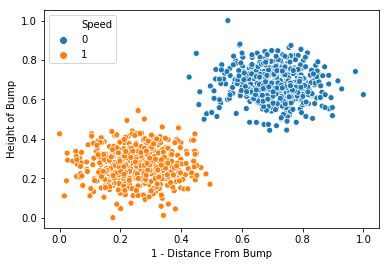

In [4]:
sns.scatterplot(speed_data['1 - Distance From Bump'], speed_data['Height of Bump'], hue = speed_data['Speed'])

In [5]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [6]:
y_train = speed_data['Speed']

In [ ]:
# Adam optimizer is a specialized gradient-descent algorithm that uses the gradient to traint the network.
# Adam optimizer uses backpropagation algorithm to first compute the gradient of the function. 

In [7]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.6118
Epoch 2/100
 - 0s - loss: 0.6067
Epoch 3/100
 - 0s - loss: 0.6017
Epoch 4/100
 - 0s - loss: 0.5968
Epoch 5/100
 - 0s - loss: 0.5919
Epoch 6/100
 - 0s - loss: 0.5870
Epoch 7/100
 - 0s - loss: 0.5821
Epoch 8/100
 - 0s - loss: 0.5774
Epoch 9/100
 - 0s - loss: 0.5727
Epoch 10/100
 - 0s - loss: 0.5681
Epoch 11/100
 - 0s - loss: 0.5635
Epoch 12/100
 - 0s - loss: 0.5589
Epoch 13/100
 - 0s - loss: 0.5544
Epoch 14/100
 - 0s - loss: 0.5499
Epoch 15/100
 - 0s - loss: 0.5455
Epoch 16/100
 - 0s - loss: 0.5411
Epoch 17/100
 - 0s - loss: 0.5367
Epoch 18/100
 - 0s - loss: 0.5325
Epoch 19/100
 - 0s - loss: 0.5282
Epoch 20/100
 - 0s - loss: 0.5239
Epoch 21/100
 - 0s - loss: 0.5198
Epoch 22/100
 - 0s - loss: 0.5156
Epoch 23/100
 - 0s - loss: 0.5115
Epoch 24/100
 - 0s - loss: 0.5074
Epoch 25/100
 - 0s - loss: 0.5034
Epoch 26/100
 - 0s - loss: 0.4994
Epoch 27/100
 - 0s - loss: 0.4955
Epoch 28/100
 - 0s - loss: 0.4916
Epoch 29/100
 - 0s - loss: 0.4878
Epoch 30/100
 - 0s - lo

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
# make a prediction
y_train_predict = model.predict_classes(X_train)


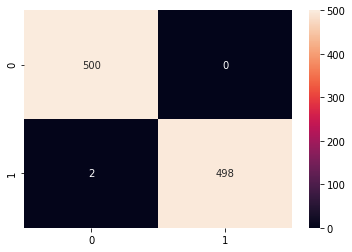

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

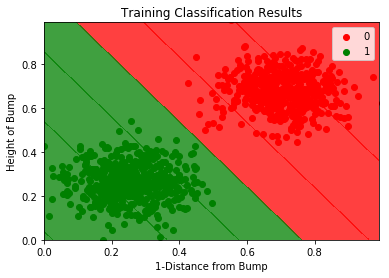

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train.values, y_train.values

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [13]:
weights, biases = model.layers[0].get_weights()

In [14]:
weights

array([[-3.2577088],
       [-2.1939056]], dtype=float32)

In [15]:
biases

array([2.282042], dtype=float32)